#                          Gmm Practice 

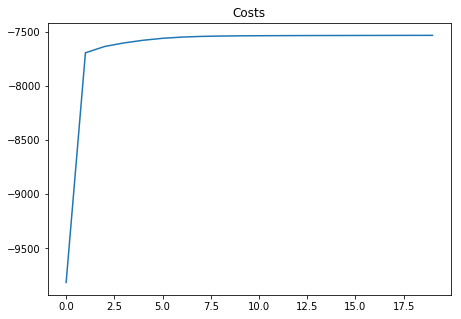

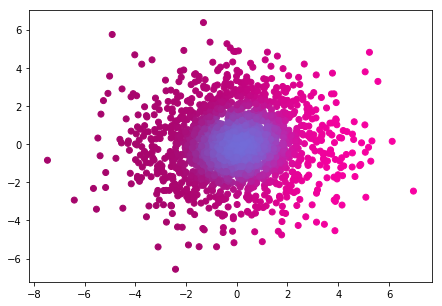

pi: [0.39887025 0.24140461 0.35972515]
means: [[-0.93055765  0.04591583]
 [ 1.30529443  0.0387124 ]
 [ 0.09405578 -0.03820692]]
covariances: [[[ 2.9300585   0.29562863]
  [ 0.29562863  3.85699678]]

 [[ 3.07074697 -0.19599573]
  [-0.19599573  3.36108134]]

 [[ 0.61138709  0.05296135]
  [ 0.05296135  0.61703653]]

 ...

 [[ 0.          0.        ]
  [ 0.          0.        ]]

 [[ 0.          0.        ]
  [ 0.          0.        ]]

 [[ 0.          0.        ]
  [ 0.          0.        ]]]


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal



def gmm(X,K,max_iter=20,smoothing=1e-2):
    N,D=X.shape
    M=np.zeros((K,D))
    R=np.zeros((N,K))
    C=np.zeros((N,D,D))
    pi=np.ones(K)/K
    for k in range(K):
        M[k]=X[np.random.choice(N)]
        C[k]=np.eye(D)
    costs=np.zeros(max_iter)
    weighted_pdfs=np.zeros((N,K))
    for i in range(max_iter):
        for k in range(K):
            weighted_pdfs[:,k]=pi[k]*multivariate_normal.pdf(X,M[k],C[k])
        R=weighted_pdfs/weighted_pdfs.sum(axis=1,keepdims=True)
        for k in range(K):
            Nk=R[:,k].sum()
            pi[k]=Nk/N
            M[k]=R[:,k].dot(X)/Nk     # doubt 
            C[k]=np.sum(R[n,k]*np.outer(X[n]-M[k],X[n]-M[k]) for n in range(N))/Nk+np.eye(D)*smoothing
        costs[i]=np.log(weighted_pdfs.sum(axis=1)).sum()
        if i>0:
            if np.abs(costs[i]-costs[i-1])<.1:
                break
    plt.plot(costs)
    plt.title("Costs")
    plt.show()
    
    random_colors = np.random.random((K, 3))
    colors = R.dot(random_colors)
    plt.scatter(X[:,0], X[:,1], c=colors)
    plt.show()
    
    
    print("pi:", pi)
    print("means:", M)
    print("covariances:", C)
    return R


        
        
    
    
def main():
    # assume 3 means
    D = 2 # so we can visualize it more easily
    s = 4 # separation so we can control how far apart the means are
    mu1 = np.array([0, 0])
    mu2 = np.array([s, s])
    mu3 = np.array([0, s])
    
    
    N=2000
    X=np.zeros((N,D))
    X[:1200,:]=np.random.randn(1200,2)*2+mu1
    X[1200:1800,:]=np.random.randn(600,2)+mu1
    X[1800:2000,:]=np.random.randn(200,2)*.5+mu1

    plt.rcParams['figure.figsize']=[13/1.8,9/1.8]
#     plt.scatter(X[:,0],X[:,1])
#     plt.show()
    
    K=3
    gmm(X,K)
    
main()
    

In [13]:
a=np.random.randn(8,2)
random_c=np.random.random((2,3))


array([[ 1.29050331,  2.64381309],
       [ 0.39369152, -1.70014442],
       [ 0.38306232, -0.59063665],
       [-0.36548897, -0.05438148],
       [-0.89543606, -0.48619923],
       [-0.35222414,  0.52817789],
       [ 0.73656381,  0.27969059],
       [ 0.24666038,  0.2256456 ]])